# Assignment 2
## Ben Seidenberg

Import Data

In [1]:
import pandas as pd
import numpy as np

kepler = pd.read_csv("datasets\\Kepler\\cumulative.csv")
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [2]:
kepler.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


Extracting Test Set from Data using train_test_split

In [3]:
from sklearn.model_selection import train_test_split

## Data Prep

In [4]:
confirmed = np.array(kepler["koi_disposition"] == "CONFIRMED")
no_cat = kepler.drop(columns=["rowid", "koi_score", 'kepid','kepoi_name','kepler_name','koi_disposition','koi_pdisposition','koi_tce_delivname'], axis=1)
no_cat["confirmed"] = confirmed
no_cat.columns

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1',
       'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'confirmed'],
      dtype='object')

In [5]:
c_m = no_cat.corr()
c_m["confirmed"].sort_values(ascending=False)

confirmed            1.000000
koi_steff_err2       0.303017
koi_slogg_err2       0.251391
koi_duration_err2    0.188597
koi_tce_plnt_num     0.179302
koi_time0bk_err2     0.144306
koi_period_err2      0.135845
koi_slogg            0.133942
dec                  0.086639
koi_srad_err2        0.065660
koi_kepmag           0.029368
koi_insol_err2       0.025413
koi_prad_err2        0.015751
koi_depth_err2       0.014215
koi_impact_err2      0.009710
koi_depth_err1      -0.014215
koi_prad            -0.018719
koi_period          -0.020452
koi_prad_err1       -0.025302
koi_insol           -0.026674
koi_insol_err1      -0.037170
koi_impact          -0.053034
koi_srad            -0.062248
koi_time0bk         -0.073760
koi_impact_err1     -0.102430
koi_duration        -0.113940
koi_srad_err1       -0.116649
koi_model_snr       -0.124472
ra                  -0.131990
koi_slogg_err1      -0.135346
koi_period_err1     -0.135845
koi_time0bk_err1    -0.144306
koi_depth           -0.158632
koi_steff 

In [6]:
err=[c for c in no_cat.columns if "err" in c]
#print(err)
koi_perr_err = pd.Series(np.abs(no_cat["koi_period_err1"]) + np.abs(no_cat["koi_period_err2"]), name="koi_perr_err")
koi_time0bk_err = pd.Series(np.abs(no_cat["koi_time0bk_err1"]) + np.abs(no_cat["koi_time0bk_err2"]), name="koi_time0bk_err")
koi_impact_err = pd.Series(np.abs(no_cat["koi_impact_err1"]) + np.abs(no_cat["koi_impact_err2"]), name="koi_impact_err")
koi_duration_err = pd.Series(np.abs(no_cat["koi_duration_err1"]) + np.abs(no_cat["koi_duration_err2"]), name="koi_duration_err")
koi_depth_err = pd.Series(np.abs(no_cat["koi_depth_err1"]) + np.abs(no_cat["koi_depth_err2"]), name="koi_depth_err")
koi_prad_err = pd.Series(np.abs(no_cat["koi_prad_err1"]) + np.abs(no_cat["koi_prad_err2"]), name="koi_prad_err")
koi_teq_err = pd.Series(np.abs(no_cat["koi_teq_err1"]) + np.abs(no_cat["koi_teq_err2"]), name="koi_teq_err")
koi_insol_err = pd.Series(np.abs(no_cat["koi_insol_err1"]) + np.abs(no_cat["koi_insol_err2"]), name="koi_insol_err")
koi_steff_err = pd.Series(np.abs(no_cat["koi_steff_err1"]) + np.abs(no_cat["koi_steff_err2"]), name="koi_steff_err")
koi_slogg_err = pd.Series(np.abs(no_cat["koi_slogg_err1"]) + np.abs(no_cat["koi_slogg_err2"]), name="koi_slogg_err")
koi_srad_err = pd.Series(np.abs(no_cat["koi_srad_err1"]) + np.abs(no_cat["koi_srad_err2"]), name="koi_srad_err")
new_data = [koi_perr_err, koi_time0bk_err, koi_impact_err, koi_duration_err, koi_depth_err, koi_prad_err, koi_teq_err, koi_insol_err, 
                        koi_steff_err, koi_slogg_err, koi_srad_err]
columns = ["koi_perr_err", "koi_time0bk_err", "koi_impact_err", "koi_duration_err", "koi_depth_err", "koi_prad_err", "koi_teq_err", "koi_insol_err", 
                        "koi_steff_err", "koi_slogg_err", "koi_srad_err"]

In [7]:
remove = [c for c in no_cat.columns if "err" not in c]
no_cat = no_cat[remove]
#for i in range(len(columns)):
  #  no_cat[columns[i]] = new_data[i]

no_cat
c_m = no_cat.corr()
c_m["confirmed"].sort_values(ascending=False)

confirmed           1.000000
koi_tce_plnt_num    0.179302
koi_slogg           0.133942
dec                 0.086639
koi_kepmag          0.029368
koi_prad           -0.018719
koi_period         -0.020452
koi_insol          -0.026674
koi_impact         -0.053034
koi_srad           -0.062248
koi_time0bk        -0.073760
koi_duration       -0.113940
koi_model_snr      -0.124472
ra                 -0.131990
koi_depth          -0.158632
koi_steff          -0.165421
koi_teq            -0.165640
koi_fpflag_ec      -0.206653
koi_fpflag_nt      -0.257237
koi_fpflag_co      -0.272591
koi_fpflag_ss      -0.293209
Name: confirmed, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

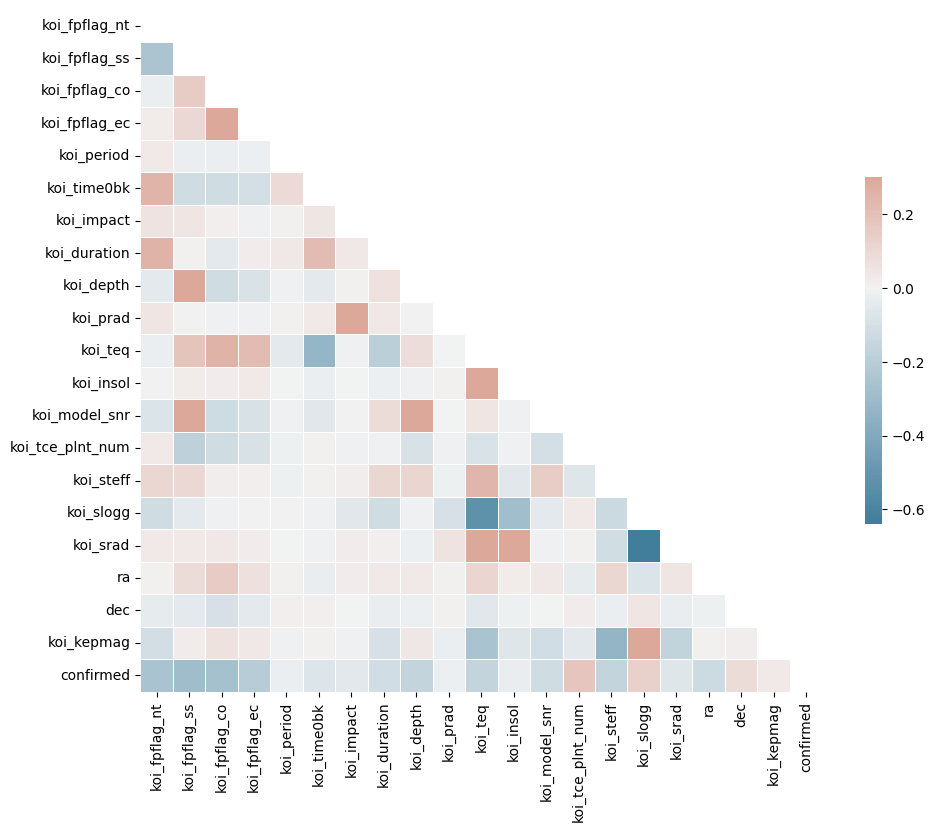

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(c_m, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c_m, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
vals = c_m["confirmed"].sort_values(ascending=False)
better_corr = [f'{val}' for val in vals.keys() if abs(vals[val]) >= 0.2]
print(better_corr)

final_cols = no_cat[better_corr]
final_cols

['confirmed', 'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ss']


,confirmed,koi_fpflag_ec,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss
0,True,0,0,0,0
1,True,0,0,0,0
2,False,0,0,0,1
3,False,0,0,0,1
4,True,0,0,0,0
...,...,...,...,...,...
9559,False,1,0,0,0
9560,False,0,0,1,1
9561,False,0,0,0,0
9562,False,0,0,1,0


In [12]:
looking = final_cols[final_cols.isna().any(axis=1)]
looking

#print(no_cat.dropna().shape[0], no_cat.shape[0])

,confirmed,koi_fpflag_ec,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss


In [13]:

train_set, test_set = train_test_split(final_cols, test_size=1100, random_state=42) 
x_train = train_set.drop("confirmed", axis=1)
y_train = train_set["confirmed"]
x_test = test_set.drop("confirmed", axis=1)
y_test = test_set["confirmed"]

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


k_pipe = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy="mean")),
        ('std_scaler', StandardScaler(with_std=True)),
    ])

In [15]:
prep = k_pipe.fit_transform(x_train)

In [16]:
prep[75]

array([-0.36540501, -0.48075698, -0.49078893, -0.54640447])

## Model Building

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(prep, y_train)

SGDClassifier()

In [18]:
print(sgd_model.predict(prep[0:20]))
print(y_train[0:20])

[False False False False False False False False False False False False
 False False False False False False False False]
9281    False
3768    False
9278    False
5349     True
4074    False
2228    False
9192    False
1313     True
7436    False
5682     True
5186     True
7078    False
4091     True
2301     True
7647    False
766     False
6110    False
4792    False
3443    False
8972    False
Name: confirmed, dtype: bool


In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_model, prep, y_train, cv=3)

In [20]:
prep

array([[-0.36540501, -0.48075698, -0.49078893, -0.54640447],
       [-0.36540501, -0.48075698, -0.49078893, -0.54640447],
       [-0.36540501, -0.48075698,  2.03753578,  1.8301461 ],
       ...,
       [-0.36540501, -0.48075698, -0.49078893,  1.8301461 ],
       [-0.36540501, -0.48075698, -0.49078893, -0.54640447],
       [-0.36540501, -0.48075698,  2.03753578, -0.54640447]],
      shape=(8464, 4))

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5756,  666],
       [1376,  666]])

In [22]:
from sklearn.metrics import precision_score, recall_score
p_score = precision_score(y_train, y_train_pred)
r_score = recall_score(y_train, y_train_pred)
print(f"P-Score: {p_score:.2f}")
print(f"R-Score: {r_score:.2f}")

P-Score: 0.50
R-Score: 0.33


Optimization

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from numpy.random import uniform
from scipy.stats import randint

In [32]:
updated = SGDClassifier(random_state=42)
grid = {
        #'loss': ["hinge", "log_loss",  "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
        'alpha': uniform(low=0, high=0.05, size=1000),
        'max_iter': randint(low=1000, high=10000),
        'l1_ratio': uniform(low=0, high=0.5, size =1000),
        'power_t': uniform(low=-1, high=1, size=1000),
        'eta0': uniform(low=0, high=0.1, size=1000)
    }

rnd_search = RandomizedSearchCV(updated, param_distributions=grid, n_iter=500, cv=3, scoring='f1', random_state=42)
rnd_search.fit(prep, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_iter=500,
                   param_distributions={'alpha': array([8.12687498e-03, 1.94145456e-02, 3.69447379e-02, 1.73021368e-02,
       3.05376858e-02, 2.44378438e-02, 1.56232616e-03, 1.53682725e-02,
       5.41913419e-03, 3.50276252e-02, 4.07867022e-02, 2.06584092e-02,
       4.99288880e-02, 1.18012776e-02, 4.13057126e-03, 2.87877013e-0...
        5.57978711e-01,  4.48087893e-01, -1.30332753e-01, -9.20822953e-01,
        7.37949252e-01, -4.99772042e-01, -1.36740269e-01,  9.46250939e-01,
       -5.82494626e-01,  5.29199772e-01, -2.84155088e-01,  3.35728421e-01,
       -5.16024087e-01, -9.15217671e-01, -8.46227361e-01,  7.06263730e-01,
        8.03973922e-01, -4.80495153e-01, -4.30330189e-01, -5.71590928e-01,
       -6.34894463e-01,  5.59233581e-01,  9.44045757e-01,  1.09687233e-01])},
                   random_state=42, scoring='f1')

In [33]:
best = rnd_search.best_estimator_
best

SGDClassifier(alpha=np.float64(0.0006464334311988396),
              eta0=np.float64(0.09046934537806077),
              l1_ratio=np.float64(0.17061096124317887), max_iter=4665,
              power_t=np.float64(0.01709490073613318), random_state=42)

In [30]:
rnd_search.best_params_

{'alpha': np.float64(0.0018312303005682262),
 'eta0': np.float64(0.011767297242267872),
 'l1_ratio': np.float64(0.007983854528599288),
 'loss': 'perceptron',
 'max_iter': 3832,
 'power_t': np.float64(-0.07718192450613848)}

In [35]:
models = pd.DataFrame(rnd_search.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_l1_ratio,param_max_iter,param_power_t,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
458,0.014446,0.000986,0.010472,0.002081,0.000646,0.090469,0.170611,4665,0.017095,"{'alpha': 0.0006464334311988396, 'eta0': 0.090...",0.648622,0.662028,0.654279,0.654976,0.005495,1
443,0.017630,0.004214,0.008919,0.002336,0.000128,0.097322,0.179678,2949,-0.005349,"{'alpha': 0.0001282614828652773, 'eta0': 0.097...",0.000000,0.662028,0.654279,0.438769,0.310273,2
46,0.005668,0.001020,0.002739,0.000699,0.000128,0.015662,0.175022,1663,-0.724337,"{'alpha': 0.0001282614828652773, 'eta0': 0.015...",0.000000,0.662028,0.654279,0.438769,0.310273,2
456,0.013850,0.003109,0.008333,0.002051,0.000666,0.081659,0.457652,4638,0.068600,"{'alpha': 0.0006658898278803283, 'eta0': 0.081...",0.648622,0.000000,0.654279,0.434300,0.307105,4
365,0.016542,0.004180,0.008814,0.001160,0.000788,0.099379,0.180428,5346,0.068590,"{'alpha': 0.0007880585869034285, 'eta0': 0.099...",0.648622,0.000000,0.654279,0.434300,0.307105,4


In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#final go using more specific paramaters
updated = SGDClassifier(random_state=42)
grid = {
        'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
        'max_iter': [1000, 5000, 10000],
        'power_t': np.arange(0, 0.1, 0.02),
        'eta0': np.arange(0, 0.1, 0.02)
    }

grid_search = GridSearchCV(updated, param_grid=grid, cv=5, scoring='f1')
grid_search.fit(prep, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01],
                         'eta0': array([0.  , 0.02, 0.04, 0.06, 0.08]),
                         'max_iter': [1000, 5000, 10000],
                         'power_t': array([0.  , 0.02, 0.04, 0.06, 0.08])},
             scoring='f1')

In [53]:
models = pd.DataFrame(grid_search.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,param_power_t,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
75,0.008214,0.001816,0.002996,0.000768,0.00001,0.0,1000,0.00,"{'alpha': 1e-05, 'eta0': 0.0, 'max_iter': 1000...",0.646531,0.657261,0.0,0.641694,0.661765,0.52145,0.260824,1
77,0.008196,0.001412,0.003140,0.000463,0.00001,0.0,1000,0.04,"{'alpha': 1e-05, 'eta0': 0.0, 'max_iter': 1000...",0.646531,0.657261,0.0,0.641694,0.661765,0.52145,0.260824,1
78,0.009227,0.001535,0.003791,0.001548,0.00001,0.0,1000,0.06,"{'alpha': 1e-05, 'eta0': 0.0, 'max_iter': 1000...",0.646531,0.657261,0.0,0.641694,0.661765,0.52145,0.260824,1
76,0.008360,0.002419,0.003058,0.001284,0.00001,0.0,1000,0.02,"{'alpha': 1e-05, 'eta0': 0.0, 'max_iter': 1000...",0.646531,0.657261,0.0,0.641694,0.661765,0.52145,0.260824,1
79,0.007738,0.001639,0.002746,0.000247,0.00001,0.0,1000,0.08,"{'alpha': 1e-05, 'eta0': 0.0, 'max_iter': 1000...",0.646531,0.657261,0.0,0.641694,0.661765,0.52145,0.260824,1


In [54]:
best = grid_search.best_estimator_

In [55]:
final = k_pipe.fit_transform(x_test)
final[0]

array([-0.39889204,  2.05262518, -0.50142005, -0.568952  ])

In [56]:
results = best.predict(final)
confusion_matrix(y_test, results)

array([[849,   0],
       [251,   0]])

In [57]:
from sklearn.metrics import f1_score
p_score = precision_score(y_test, results)
r_score = recall_score(y_test, results)
f_score = f1_score(y_test, results)
print(f"P-Score: {p_score:.2f}")
print(f"R-Score: {r_score:.2f}")
print(f"F1 Score: {f_score:.2f}")

P-Score: 0.00
R-Score: 0.00
F1 Score: 0.00


c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## ROC

In [57]:
from sklearn.metrics import precision_recall_curve

In [58]:
y_scores =  cross_val_predict(best, prep, y_train, cv=3,
 method="decision_function")

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

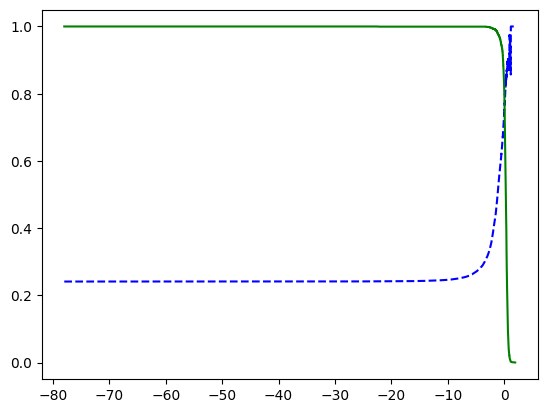

In [60]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

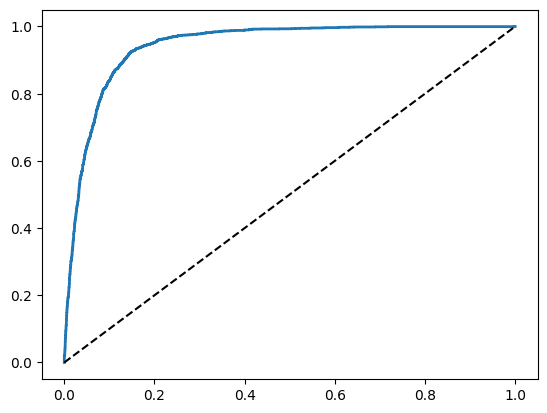

In [62]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [63]:
roc_auc_score(y_train, y_scores)

np.float64(0.9427793356029149)

In [64]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

models = models = [
    LogisticRegression(),
    DecisionTreeClassifier(), ExtraTreeClassifier(),
    RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(),
    GaussianNB(), BernoulliNB(),
    SGDClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    LinearSVC()

]


In [65]:
from sklearn.metrics import f1_score
for model in models:
    model.fit(prep, y_train)
    y_train_pred = cross_val_predict(model, prep, y_train, cv=3)
    fs = f1_score(y_train, y_train_pred)
    print(f"{model.__class__.__name__}: \nScore: {fs*100:.2f}%\n")


LogisticRegression: 
Score: 78.06%

DecisionTreeClassifier: 
Score: 71.74%

ExtraTreeClassifier: 
Score: 68.14%

RandomForestClassifier: 
Score: 80.94%

AdaBoostClassifier: 
Score: 78.63%

BaggingClassifier: 
Score: 78.35%

ExtraTreesClassifier: 
Score: 80.91%

GradientBoostingClassifier: 
Score: 81.85%

HistGradientBoostingClassifier: 
Score: 82.45%

GaussianNB: 
Score: 68.84%

BernoulliNB: 
Score: 74.77%

SGDClassifier: 
Score: 74.99%

RidgeClassifier: 
Score: 63.08%

KNeighborsClassifier: 
Score: 71.62%



c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

MLPClassifier: 
Score: 80.91%

LinearSVC: 
Score: 77.35%



Moving Forward with the HistGardientBoostingClassifier

In [66]:
best = HistGradientBoostingClassifier(random_state=42)
grid = {
        'learning_rate': uniform(0,1,500),
        'max_leaf_nodes': randint(low=3, high=200),
        'max_iter': randint(low=10, high=200),
        'max_depth': randint(low=500, high=1000),
        'min_samples_leaf': randint(low=20, high=100),
        'max_features': uniform(low=0.25, high=0.75, size=1000),
        'max_bins': randint(low=10, high=255),
    }

rnd_search = RandomizedSearchCV(best, param_distributions=grid,
                                n_iter=100, cv=3, scoring='precision', random_state=42)
rnd_search.fit(prep, y_train)

c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': array([0.16441465, 0.46619725, 0.81754776, 0.07699892, 0.6007857 ,
       0.98552599, 0.46937312, 0.50721839, 0.74620165, 0.79792976,
       0.37557141, 0.96584471, 0.53941996, 0.86162485, 0.07539528,
       0.76941041, 0.40126334, 0.4557252 , 0.48195205, 0.2203...
       0.25004979, 0.39158638, 0.28385892, 0.48759849, 0.36623459]),
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019D6429F9B0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019D63CA4640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019D63C79480>},
                   random_state=42, scoring='precision')

In [67]:
models = pd.DataFrame(rnd_search.cv_results_)
models.sort_values("rank_test_score")[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_bins,param_max_depth,param_max_features,param_max_iter,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
35,1.799906,0.151832,0.044687,0.012149,0.234022,77,938,0.668319,193,125,36,"{'learning_rate': 0.2340219354686105, 'max_bin...",0.821277,0.835277,0.807747,0.821434,0.011239,1
80,1.071622,0.043213,0.030729,0.000358,0.383488,78,599,0.478785,189,140,38,"{'learning_rate': 0.38348836799610386, 'max_bi...",0.827035,0.830189,0.799427,0.818883,0.013818,2
97,0.876482,0.137875,0.024016,0.003618,0.442837,153,556,0.713440,118,183,61,"{'learning_rate': 0.4428368709148449, 'max_bin...",0.822095,0.832335,0.801136,0.818522,0.012985,3
94,0.798535,0.008497,0.031230,0.000691,0.481952,186,599,0.617994,198,149,95,"{'learning_rate': 0.48195204939830905, 'max_bi...",0.821997,0.834564,0.798851,0.818471,0.014792,4
76,0.540696,0.033504,0.016749,0.000918,0.800036,163,643,0.403066,95,187,48,"{'learning_rate': 0.8000362391793261, 'max_bin...",0.820852,0.827327,0.806452,0.818210,0.008725,5


In [68]:
best = rnd_search.best_estimator_
final_data = k_pipe.fit_transform(x_test)
predicted = best.predict(final_data)

c:\Users\bense\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['koi_teq_err']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [69]:
print(precision_score(y_test, predicted))
print(recall_score(y_test, predicted))
print(f1_score(y_test, predicted))

0.9047619047619048
0.07569721115537849
0.13970588235294118
